# **predicting heart disease using machin learning**
we are going to predict whether a patient has a heart disease or not 

## we are going to take the folloing approach 
problem definition  
data  
evaluation  
features  
modeling  
experimentation  

## *problem definition*
in a statement ,  
given clinical parameters about a patient , can we predict whether a patient has heart disease or not 

In [4]:
# import all the tools we need 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

# models from scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# model evaluations 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

In [3]:
!pip install seaborn

In [6]:
# exploring our data
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
columns = df.columns
columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
for i in columns:
    print(df[i].value_counts())

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64
sex
1    207
0     96
Name: count, dtype: int64
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64
trestbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1

In [11]:
df['target'].value_counts()
# the result shows us that we have a relatively balanced problem because we have quite similar amount of examples in both classes 

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

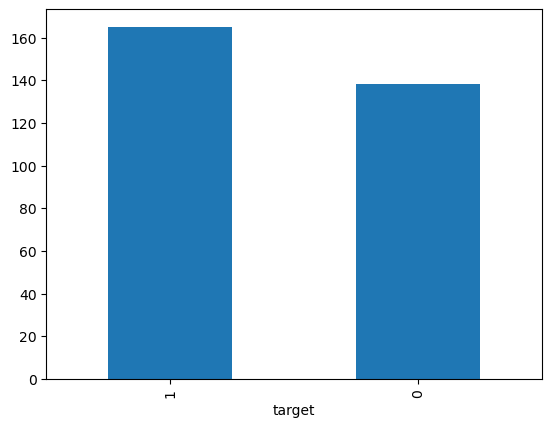

In [12]:
# df['target'].value_counts().plot.bar()
df['target'].value_counts().plot(kind='bar')

In [13]:
# check if there are any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
# comparing different columns together 
# comparing sex column with target column 
pd.crosstab(df.target, df.sex)
# so what we can say is that here we have roughly 100 women which 72 % of them have heart disease 
# so we can say if the person in our data is a woman it has 72% probability that she has heart disease 


sex,0,1
target,,
0,24,114
1,72,93


In [16]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

C:\Users\Clinic Laptop\AppData\Local\Temp\ipykernel_8040\525042308.py:6: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('male', 'female')


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

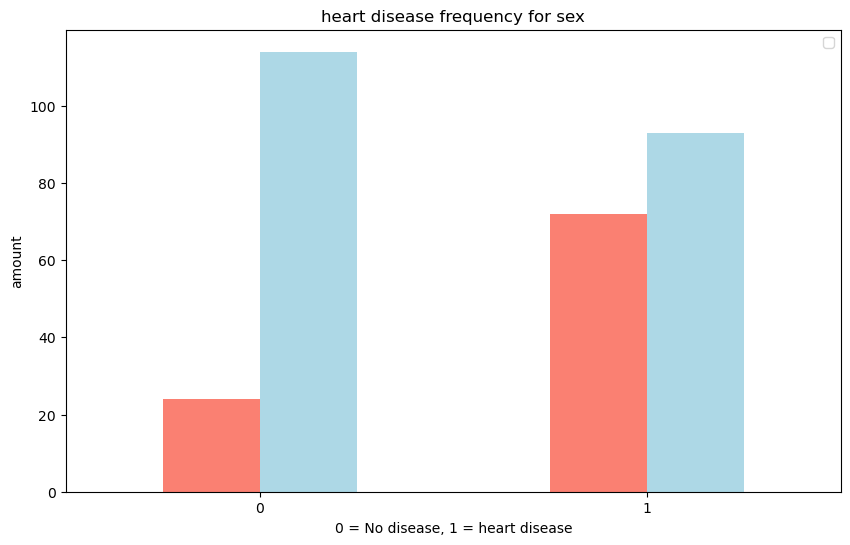

In [17]:
# create a plot of the crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(10, 6), color = ['salmon', 'lightblue'])
plt.title('heart disease frequency for sex')
plt.xlabel("0 = No disease, 1 = heart disease")
plt.ylabel('amount')
plt.legend('male', 'female')
plt.xticks(rotation=0)

Text(0, 0.5, 'people with heart disease')

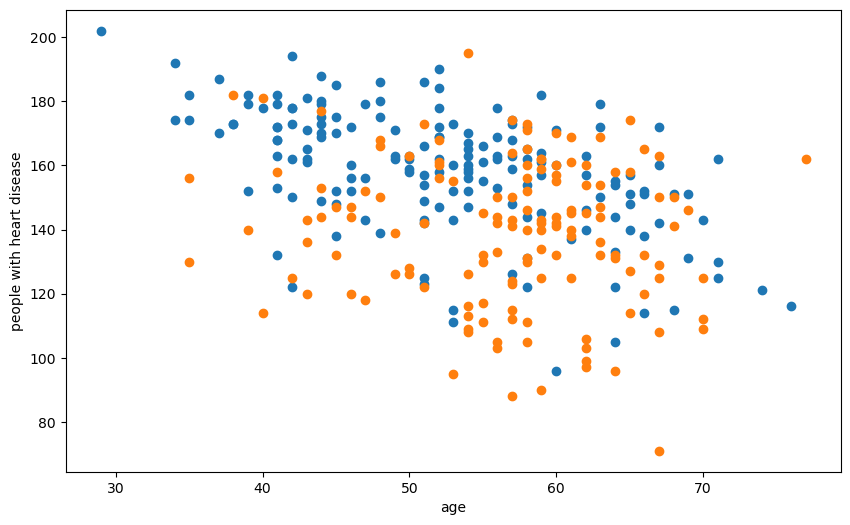

In [18]:
# creating another figure 
plt.figure(figsize=(10,6))
# scatter plot with positive examples 
plt.scatter(df.age[df['target']==1], df.thalach[df['target']==1])
plt.xlabel('age')
plt.ylabel('people with heart disease')

# scatter with negative examples 
plt.scatter(df['age'][df.target==0],df['thalach'][df.target==0])
plt.xlabel('age')
plt.ylabel('people with heart disease')

<Axes: ylabel='Frequency'>

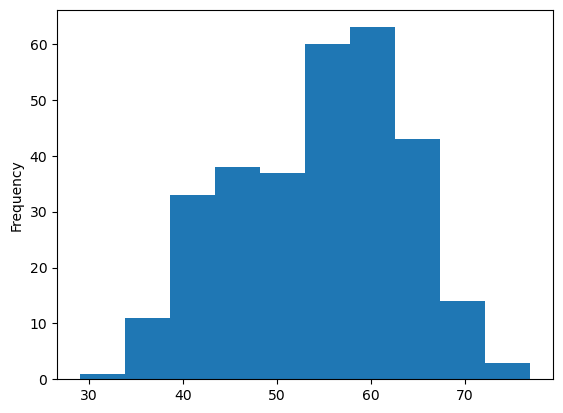

In [19]:
# check the distribution of age with histogram 
df.age.plot.hist()

In [20]:
# comparing chest pain column with target column 
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Text(0, 0.5, 'the number of people with heart disease')

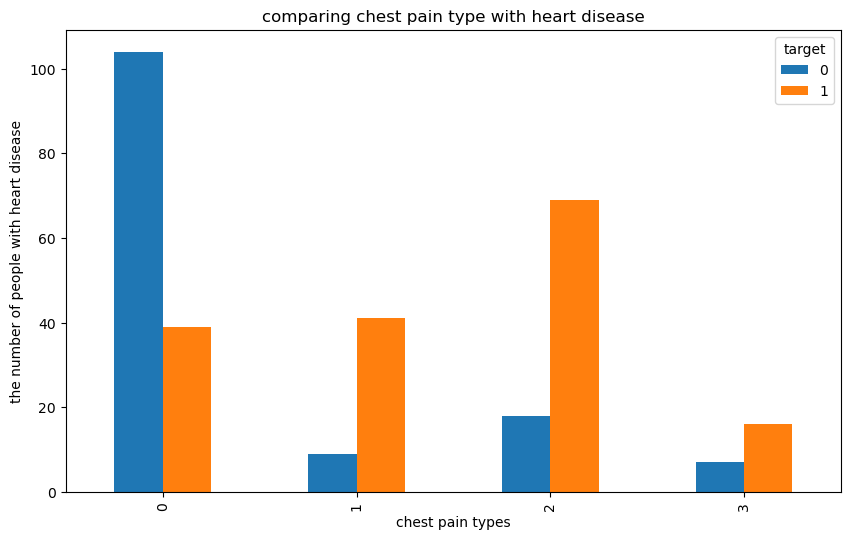

In [21]:
# make the crosstab more visual 
pd.crosstab(df.cp, df.target).plot.bar(figsize=(10, 6))
plt.title('comparing chest pain type with heart disease')
plt.xlabel('chest pain types')
plt.ylabel('the number of people with heart disease')


In [22]:
# make a correlation matrix 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


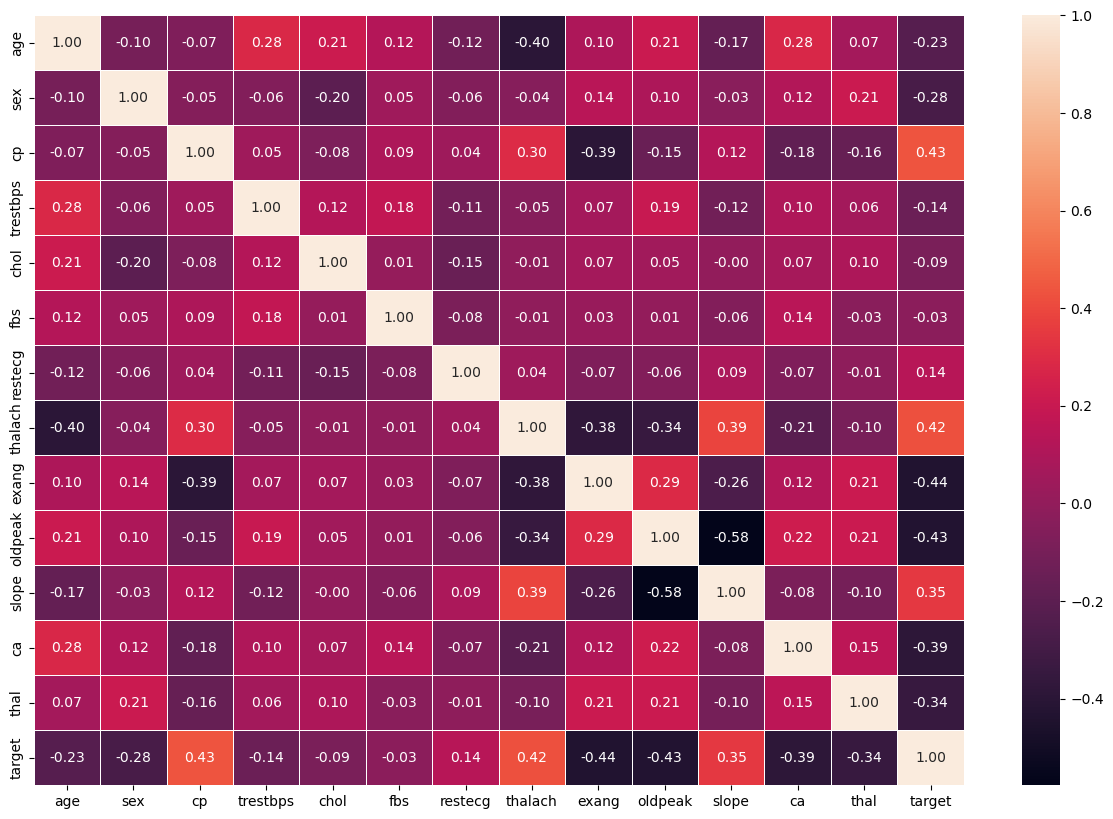

In [23]:
# let's make our confusion matrix a little prettier 
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,annot=True, linewidth=0.5, fmt='.2f')

In [24]:
# split the data into x and y 
x = df.drop('target', axis = 1)
y = df['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [25]:
# split the data into train and test 
np.random.seed(42)
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, x_test.shape


((242, 13), (61, 13))

##### **now we havegot our data into train and test sets it is time to make a machine learning model**
#### I am going to try 3 different machine learning models : 1-logistic regression 2- k nearest neighbours classifier 3-Random forest classifier

In [26]:
# put models in a dictionary 
models = {'LR':LogisticRegression(max_iter=1000),
         "KNN":KNeighborsClassifier(),
         "RFC":RandomForestClassifier()}


In [27]:
# create a function to fit and score models 
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    fits and evaluates given machine learning models 
    models : a dict of different machine learning models 
    x_train : training data(no labels)
    x_test : testing data(no labels)
    y_train : training data(labels)
    y_test : testing data(labels)
    """
    # set random seed 
    np.random.seed(42)
    # make a dictionary to keep model scores
    model_scores = {}
    # loop through models 
    for name, model in models.items() :
        # fit the model to the data
        model.fit(x_train, y_train)
        # evaluate the model and append its score to model scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores
        
        

In [28]:
model_scores = fit_and_score(models, x_train, x_test, y_train, y_test)
print(model_scores)

{'LR': 0.8852459016393442, 'KNN': 0.6885245901639344, 'RFC': 0.8360655737704918}


In [29]:
# hyper parameter tuning 
train_scores = []
test_scores = []
# create a list of different values for n_neighbours
neighbours = range(1, 21)
# set up knn instance 
knn = KNeighborsClassifier()

# loop through different n_neighbours 
for i in neighbours:
    knn.set_params(n_neighbors=i)
    # fit the algorithm
    knn.fit(x_train, y_train)
    # update the train score list 
    train_scores.append(knn.score(x_train, y_train))

    # update the test scores list 
    test_scores.append(knn.score(x_test, y_test))


In [30]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [31]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

maximum knn score on the test data : 75.41%


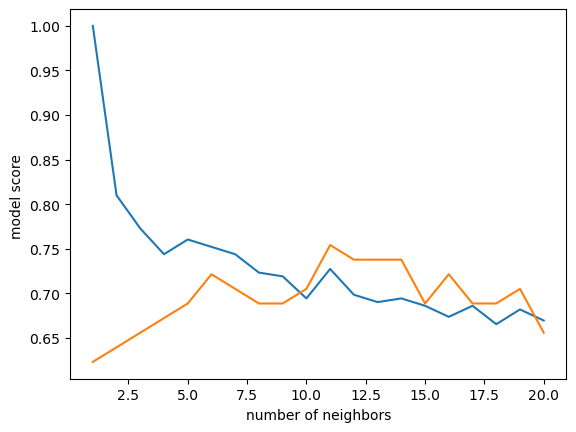

In [32]:
# now let's visualize them 
plt.plot(neighbours, train_scores, label="train scores")
plt.plot(neighbours, test_scores, label="test scores")
plt.xlabel('number of neighbors')
plt.ylabel('model score ')
print(f'maximum knn score on the test data : {max(test_scores)*100:.2f}%')

# so that shows that we can improve our model by setting k = 11 but overall it's much lower than the logisticRegression so we go for that and skip this

In [33]:
# create a hyperparameter grid for LogisticRegression
log_reg_grid = {
    "C":np.logspace(-4, 4, 20),
    "solver":["liblinear"]
}
# create a hyperparameter grid for RandomforestClassifier
rf_grid = {
    "n_estimators":np.arange(10, 1000, 50),
    "max_depth":[None, 3, 5, 10], 
    "min_samples_split":np.arange(2, 20, 2),
    "min_samples_leaf":np.arange(1, 20, 2)
}

In [34]:
# tune logistic regression
np.random.seed(42)
# setup random hyperparameters search for logistic regression 
rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)

# fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [35]:
# check for best params 
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [36]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

In [37]:
# now let's tune the RandomForest 
np.random.seed(42)

# setup random hyperparameter search for RandomforestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)
# let's fit 
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [38]:
# let's find the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [39]:
# let's evaluate it 
rs_rf.score(x_test, y_test)
# still LogisticRegression is best 

0.8688524590163934

TypeError: Axes.bar() missing 2 required positional arguments: 'x' and 'height'

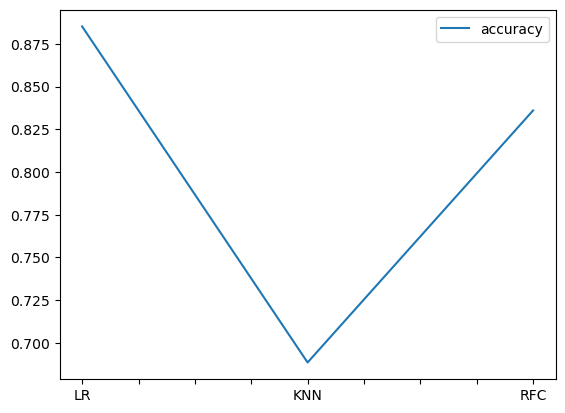

In [40]:
# model comparison
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot().bar()

In [41]:
# create a hyperparameter grid for LogisticRegression
log_reg_grid = {
    "C":np.logspace(-4, 4, 20),
    "solver":["liblinear"]
}

# setup grid hyperparamer search
gs_log_rg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)
# fit 
gs_log_rg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [42]:
gs_log_rg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [43]:
gs_log_rg.score(x_test, y_test)

0.8852459016393442

In [44]:
# make predictions with tuned model 
y_preds = gs_log_rg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [45]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [46]:
# plor ROC curve


In [47]:
# confusion matrix 
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


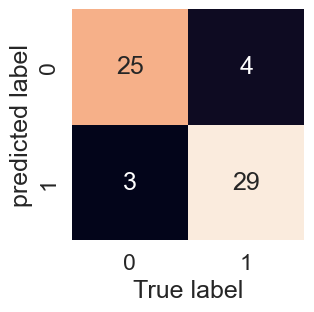

In [51]:
# now let's visualize it using seaborn 
import seaborn as sns
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
        plots a nice confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel('True label')
    plt.ylabel('predicted label')

plot_conf_mat(y_test, y_preds)

In [53]:
# evaluating our model 
# classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [54]:
# check best hyper parameters 
gs_log_rg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [55]:
# create a new classifier with the best parameters
clf = LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [69]:
# cross validated accuracy 
cv_acc = cross_val_score(clf, x, y , cv=5, scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [70]:
cv_acc = np.mean(cv_acc)

In [71]:
# cross validated precision
cv_pr = cross_val_score(clf, x, y, cv=5, scoring='precision')
cv_pr

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [72]:
cv_pr = np.mean(cv_pr)

In [73]:
# cross validated recall 
cv_recall = cross_val_score(clf, x, y, cv=5, scoring='recall')
cv_recall

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [74]:
cv_recall = np.mean(cv_recall)

In [75]:
# cross validated f1 score 
cv_f1 = cross_val_score(clf, x, y, cv=5, scoring='f1')
cv_f1

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [76]:
cv_f1 = np.mean(cv_f1)

<Axes: title={'center': 'cross validated classification metrics'}>

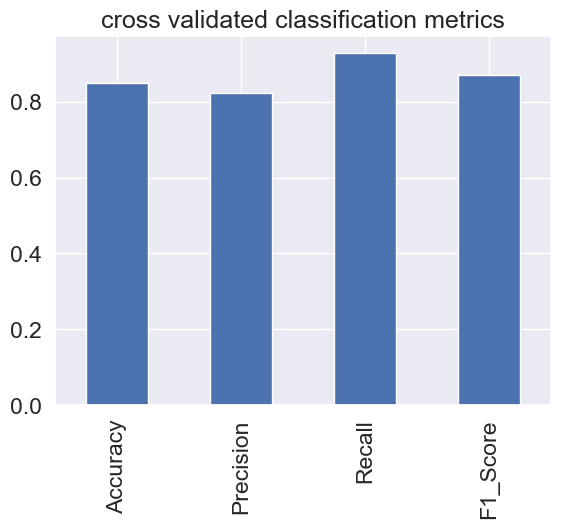

In [79]:
# visualize cross validated metrics 
cv_metrics = pd.DataFrame({
    "Accuracy":cv_acc,
    "Precision":cv_pr,
    "Recall": cv_recall,
    "F1_Score":cv_f1
    
},index=[0])
cv_metrics.T.plot.bar(title="cross validated classification metrics", legend=False)

In [81]:
# fit an instance of logistic regression 
gs_log_rg.best_params_
clf = LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [82]:
clf.fit(x_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [83]:
# match coef's of features to columns 
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.003699220787833552,
 'sex': -0.9042409028765943,
 'cp': 0.6747282587393038,
 'trestbps': -0.011613401289640978,
 'chol': -0.0017036439737437242,
 'fbs': 0.047876881152681086,
 'restecg': 0.3349019816024563,
 'thalach': 0.024729382904788766,
 'exang': -0.6312040612828977,
 'oldpeak': -0.5759095045493016,
 'slope': 0.47095140731584667,
 'ca': -0.6516534770536273,
 'thal': -0.6998420764760689}

<Axes: title={'center': 'feature importance'}>

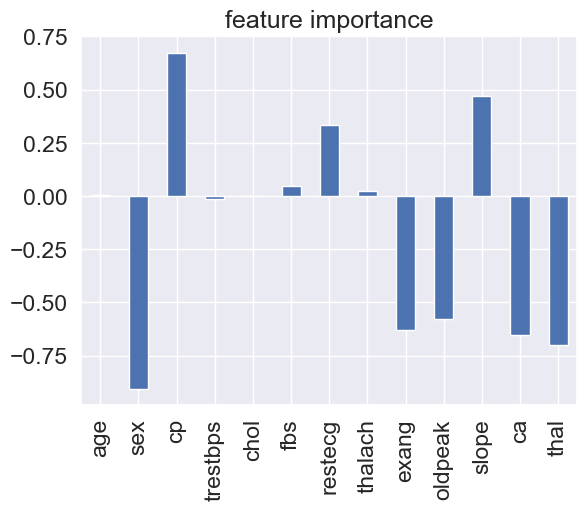

In [84]:
# visualize feature importance 
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='feature importance', legend=False)

In [85]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [87]:
# now let's check slope 
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
